## 이미지 디렉토리/ 테이블 파악

In [ ]:
!pip install cython pycocotools
!pip install torchinfo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/이미지태깅/data/"

/content/drive/MyDrive/Colab Notebooks/이미지태깅/data


In [ ]:
# !unzip -qq ./img.zip

In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/이미지태깅/data/Anno_coarse"

/content/drive/MyDrive/Colab Notebooks/이미지태깅/data/Anno_coarse


In [ ]:
import os
import pandas as pd
import re
ls = os.listdir("./")
ls

['list_attr_img.txt',
 'list_category_img.txt',
 'list_category_cloth.txt',
 'list_attr_cloth.txt',
 'list_landmarks.txt',
 'list_bbox.txt']

In [ ]:
ls.remove('list_landmarks.txt')
ls.remove('list_bbox.txt')
ls

['list_attr_img.txt',
 'list_category_img.txt',
 'list_category_cloth.txt',
 'list_attr_cloth.txt']

In [ ]:
for i in range(len(ls)):
  with open(ls[i], "r") as f:
      lines = f.readlines()
  data = [re.split(r'\s{4,}', line.strip()) for line in lines[2:]]
  columns = re.split(r'\s{2,}', lines[1].strip())
  globals()["df{}".format(i)] = pd.DataFrame(data, columns=columns)


In [ ]:
with open('list_bbox.txt', "r") as f:
    lines = f.readlines()
data = [re.split(r'\s{1,}', line.strip()) for line in lines[2:]]
columns = re.split(r'\s{2,}', lines[1].strip())
dflist_bbox = pd.DataFrame(data, columns=columns)

In [ ]:
# with open('list_landmarks.txt', "r") as f:
#     lines = f.readlines()
# data = [re.split(r'\s{2,}', line.strip()) for line in lines[2:]]
# columns = re.split(r'\s{2,}', lines[1].strip())


In [ ]:
dflist_bbox

,image_name,x_1,y_1,x_2,y_2
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,072,079,232,273
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,067,059,155,161
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,065,065,156,200
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,051,062,167,182
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,046,088,166,262
...,...,...,...,...,...
289217,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,001,001,300,300
289218,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,014,058,225,277
289219,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,018,041,149,230
289220,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,075,047,220,300


In [ ]:
df0 #list_attr_img


,image_name,attribute_labels
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...
...,...,...
289217,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...
289218,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...
289219,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...
289220,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...


In [ ]:
df1 #list_category_img


,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3
...,...,...
289217,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,41
289218,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,41
289219,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,41
289220,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,41


In [ ]:
df2 #list_category_cloth


,category_name,category_type
0,Anorak,1
1,Blazer,1
2,Blouse,1
3,Bomber,1
4,Button-Down,1
5,Cardigan,1
6,Flannel,1
7,Halter,1
8,Henley,1
9,Hoodie,1


In [ ]:
df3 #list_attr_cloth

,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1
...,...,...
995,zip-pocket,4
996,zip-up,4
997,zipped,4
998,zipper,4


In [ ]:
df3['attribute_type'].drop_duplicates()

0     3
1     1
14    2
16    5
22    4
Name: attribute_type, dtype: object

## 이미지 미리보기

In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/이미지태깅/data"

/content/drive/MyDrive/Colab Notebooks/이미지태깅/data


In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from torchvision.transforms.functional import to_pil_image
import torch
from torchvision import transforms

image_path = "./img/Embroidered_Floral_Peasant_Dress/img_00000049.jpg"
image = Image.open(image_path).convert("RGB")


In [ ]:
image.size

(201, 300)

In [ ]:
transform = transforms.Compose([
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(dtype = torch.float)
])
image = transform(image)

In [ ]:
img_data = dflist_bbox[dflist_bbox['image_name']=="img/Embroidered_Floral_Peasant_Dress/img_00000049.jpg"]


In [ ]:
attr_list = df0[df0['image_name']=="img/Embroidered_Floral_Peasant_Dress/img_00000049.jpg"].iloc[0,1].split()

In [ ]:
indices = [index for index, value in enumerate(attr_list) if value == '1']
indices

[310, 365, 760]

In [ ]:
texture = []
fabric = []
shape = []
part = []
style = []
for i in indices:
  name = df3.iloc[i-1,0]
  id = df3.iloc[i-1,1]
  if id == '1':
    texture.append(name)
  elif id == '2':
    fabric.append(name)
  elif id == '3':
    shape.append(name)
  elif id == '4':
    part.append(name)
  elif id == '5':
    style.append(name)


In [ ]:
attr5

['flirty', 'rebel']

In [ ]:
x1 = img_data.iloc[0,1]
y1= img_data.iloc[0,2]
x2 = img_data.iloc[0,3]
y2 = img_data.iloc[0,4]

In [ ]:

boxes = [x1,y1,x2,y2]
num = df1[df1['image_name'] == img_data.iloc[0,0]].iloc[0,1]
labels = df2.iloc[int(num)-1,0]

In [ ]:
# target = {
#     "boxes": torch.FloatTensor([float(box) for box in boxes]),
#     "labels": labels
# }
# imdata = [image,target]

In [ ]:

def draw_bbox(ax, box, text, color):
  ax.add_patch(
      plt.Rectangle(
          xy = (box[0], box[1]),
          width = box[2] - box[0],
          height = box[3] - box[1],
          fill = False,
          edgecolor = color,
          linewidth = 2,
      )
  )
  ax.annotate(
      text = text,
      xy = (box[0] - 5 , box[1] - 5),
      color = color,
      weight = "bold",
      fontsize = 13,
  )


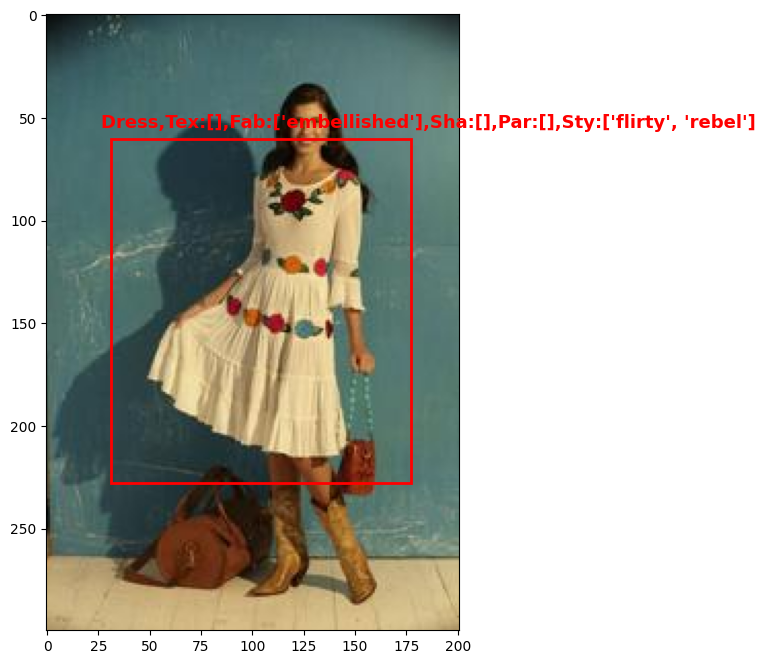

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(to_pil_image(image))
draw_bbox(ax, imdata[1]['boxes'],f"{labels},Tex:{texture},Fab:{fabric},Sha:{shape},Par:{part},Sty:{style}", "red")

plt.show()


## 데이터 전처리
텍스처 속성 만  
원핫 인코딩  
neck 유형만  


BodyLength/Neckline/SleeveLength/Fit/Shape/
Texture_01/Texture_02/Texture_03/Texture_04/Texture_05/
Print_01/Print_02/Print_03/Print_04/Print_05/
Detail_01/Detail_02/Detail_03/Detail_04/Detail_05/
Style_01/Style_02/Style_03/Style_04/Style_05/
Color_01/Color_02/Color_03/Color_04/Color_05/
IMAGE_INFO/GENDER/DOMAIN

In [ ]:
import re

col_names = list(map(str,range(0,1000)))


In [ ]:
df0[col_names] = df0['attribute_labels'].str.split('\s+', expand=True)

<ipython-input-18-86d070663bda>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df0[col_names] = df0['attribute_labels'].str.split('\s+', expand=True)
<ipython-input-18-86d070663bda>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df0[col_names] = df0['attribute_labels'].str.split('\s+', expand=True)
<ipython-input-18-86d070663bda>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

In [ ]:
df0.head()

,image_name,attribute_labels,0,1,2,3,4,5,6,7,...,990,991,992,993,994,995,996,997,998,999
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
df0 = df0.drop(columns = 'attribute_labels')

In [ ]:
print(df0.dtypes)
print(df0.isna().sum())


image_name    object
0             object
1             object
2             object
3             object
               ...  
995           object
996           object
997           object
998           object
999           object
Length: 1001, dtype: object
image_name      0
0             155
1             155
2             155
3             155
             ... 
995           155
996           155
997           155
998           155
999           155
Length: 1001, dtype: int64


In [ ]:
df0.fillna(0, inplace=True)
df0.iloc[:, 1:] = df0.iloc[:, 1:].astype(int)

<ipython-input-22-ecd7dcaf4e91>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df0.iloc[:, 1:] = df0.iloc[:, 1:].astype(int)


In [ ]:
df_attr = df0.replace(-1,0)

In [ ]:
df_attr.head()

,image_name,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 텍스처 아이디
df3['idx'] = range(len(df3))
df3['idx'] = df3['idx'].astype(str)
# tex_id = df3[df3['attribute_type']=="1"]['idx'].tolist()


In [ ]:
# tex_id = df3[df3['attribute_name'] in 'name']
# df3[df3['attribute_name'].str.contains('name')]

tex_id = df3[df3['attribute_name'].str.contains('neck')]['idx'].tolist()


In [ ]:
df3[df3['attribute_name'].str.contains('neck')]['attribute_name'].tolist()

['boat neck',
 'classic crew neck',
 'classic v-neck',
 'cowl neck',
 'crew neck',
 'deep v-neck',
 'fitted v-neck',
 'heathered v-neck',
 'high-neck',
 'illusion neckline',
 'knit v-neck',
 'mock neck',
 'mock-neck',
 'neck ribbed',
 'neck skater',
 'neck striped',
 'neckline',
 'print v-neck',
 'scoop-neck',
 'split-neck',
 'striped v-neck',
 'tie-neck',
 'turtle-neck',
 'v-neck']

In [ ]:
cols = ['image_name']
cols.extend(tex_id)
df_attr2 = df_attr[cols]

In [ ]:
df_attr2['tot'] = df_attr2[tex_id].sum(axis=1)

<ipython-input-42-faa0b24c716f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attr2['tot'] = df_attr2[tex_id].sum(axis=1)


In [ ]:
df_attr2 = df_attr2[df_attr2['tot']>0]

In [ ]:
df_attr2 =df_attr2.drop('tot', axis = 1)

In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/이미지태깅"

/content/drive/MyDrive/Colab Notebooks/이미지태깅


In [ ]:
df_attr2

,image_name,80,165,172,202,208,251,357,456,462,...,646,647,648,743,801,864,886,919,946,956
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22,img/Sheer_Pleated-Front_Blouse/img_00000023.jpg,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24,img/Sheer_Pleated-Front_Blouse/img_00000025.jpg,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
64,img/Sheer_Pleated-Front_Blouse/img_00000065.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
143,img/Sheer_Pleated-Front_Blouse/img_00000144.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288863,img/Cutout_Bandage_Dress/img_00000078.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
288914,img/Cutout_Bodycon_Dress/img_00000041.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
288958,img/Cutout_Crochet-Paneled_Dress/img_00000010.jpg,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
288993,img/Painted_Floral_Slip_Dress/img_00000028.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_attr2.to_csv("./df_attr.csv")

## 데이터 불러오기

In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/이미지태깅"

In [ ]:
df_attr = pd.read_csv("./df_attr.csv")
df_attr = df_attr.drop(columns = 'Unnamed: 0')

In [ ]:
df_attr.head()

In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/이미지태깅/data"

In [ ]:
import os
from tqdm import tqdm

# 유효한 이미지 주소를 가진 행을 선택
valid_rows = []

for index, row in tqdm(df_attr.iterrows(), total=len(df_attr), desc="Processing Images"):
    image_path = row['image_name']

    # 이미지 파일이 실제로 존재하는지 확인
    if os.path.exists(image_path):
        valid_rows.append(index)

# 유효한 이미지 주소를 가진 행만 선택
valid_df = df_attr.loc[valid_rows]

In [ ]:
valid_df

In [ ]:
valid_df.to_csv("./valid_df.csv")

## 데이터로더

In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/이미지태깅/data"

/content/drive/MyDrive/Colab Notebooks/이미지태깅/data


In [ ]:
import pandas as pd
valid_df = pd.read_csv("./valid_df.csv")
valid_df = valid_df.drop(columns = 'Unnamed: 0')

In [ ]:
import random
import numpy as np
import os
import torch

seed = 50
os.environ['PYTHONHASHSEED']= str(seed)
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.enabled = False

In [ ]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(valid_df,
                               test_size = 0.2,
                               random_state = seed)

In [ ]:
train

,image_name,80,165,172,202,208,251,357,456,462,...,646,647,648,743,801,864,886,919,946,956
9806,img/Herringbone_Denim_Coat/img_00000005.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5622,img/Heathered_Dolman_Tee/img_00000010.jpg,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9775,img/Front-Slit_Pleated_Shift_Dress/img_0000006...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1822,img/Striped_Boat_Neck_Sweater/img_00000077.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10277,img/Square_Neck_Skater_Dress/img_00000032.jpg,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8324,img/Abstract_Patterned_Bodycon_Dress/img_00000...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10206,img/Ruched_V-Neck_Jumpsuit/img_00000034.jpg,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6253,img/Long_Crew_Neck_Tee/img_00000005.jpg,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10123,img/Scoop_Neck_Maxi_Dress/img_00000006.jpg,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
import cv2
from torch.utils.data import Dataset
import numpy as np
from PIL import Image

class ImageDataset(Dataset):
    def __init__(self, df, transform=None):
        super().__init__()
        self.df = df
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
      img_path = "./" + self.df.iloc[idx,0]
      image = Image.open(img_path).convert("RGB")
      if self.transform is not None:
          image = self.transform(image)
      label = self.df.iloc[idx, 1:].tolist()
      label = torch.FloatTensor(label)
      return image, label


In [ ]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder # 폴더명으로 클래스 구분
from torchvision import transforms

hyperparams = {
    "batch_size" : 500,
    "learning_rate": 0.0001,
    "epochs": 10,
    "transform" : transforms.Compose(
        [
            transforms.PILToTensor(),
            transforms.ConvertImageDtype(dtype = torch.float),
            transforms.Resize(256)
            ,transforms.CenterCrop(224)
            ,transforms.Normalize(
                mean = [0.48235,0.45882,0.40784],
                std = [1.0/255.0,1.0/255.0,1.0/255.0]
            )
        ]
    )
}


# # 정규화 산출
# def calculate_norm(dataset):
#     # dataset의 axis=1, 2에 대한 평균 산출
#     mean_ = np.array([np.mean(x.numpy(), axis=(1, 2)) for x, _ in dataset])
#     # r, g, b 채널에 대한 각각의 평균 산출
#     mean_r = mean_[:, 0].mean()
#     mean_g = mean_[:, 1].mean()
#     mean_b = mean_[:, 2].mean()

#     # dataset의 axis=1, 2에 대한 표준편차 산출
#     std_ = np.array([np.std(x.numpy(), axis=(1, 2)) for x, _ in dataset])
#     # r, g, b 채널에 대한 각각의 표준편차 산출
#     std_r = std_[:, 0].mean()
#     std_g = std_[:, 1].mean()
#     std_b = std_[:, 2].mean()

#     return (mean_r, mean_g, mean_b), (std_r, std_g, std_b)

# 이미지에 기본 트렌스폼 적용 후 데이터 셋 로드
# transform = transforms.Compose([
#     transforms.ToTensor(),
# ])

# datasets의 CIFAR10 데이터셋 로드 (train 데이터셋)
# train = datasets.CIFAR10(root='data',
#                          train=True,
#                          download=True,
#                          transform=transform
#                         )

# mean_, std_ = calculate_norm(train)

In [ ]:
train_dataset = ImageDataset(train,transform = hyperparams["transform"])
test_dataset =ImageDataset(valid,transform = hyperparams["transform"])



In [ ]:
train_dataloader = DataLoader(
    train_dataset,batch_size = hyperparams["batch_size"],shuffle = True, drop_last = True
)

test_dataloader = DataLoader(
    test_dataset, batch_size = hyperparams['batch_size'],shuffle = False, drop_last =True
)

In [ ]:
train_dataset.__getitem__(200)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(tensor([[[132.0007, 132.0007, 132.0007,  ..., 132.0007, 132.0007, 132.0007],
          [132.0007, 132.0007, 132.0007,  ..., 132.0007, 132.0007, 132.0007],
          [132.0007, 132.0007, 132.0007,  ..., 132.0007, 132.0007, 132.0007],
          ...,
          [132.0007, 132.0007, 132.0007,  ..., 132.0007, 132.0007, 132.0007],
          [132.0007, 132.0007, 132.0007,  ..., 132.0007, 132.0007, 132.0007],
          [132.0007, 132.0007, 132.0007,  ..., 132.0007, 132.0007, 132.0007]],
 
         [[138.0009, 138.0009, 138.0009,  ..., 138.0009, 138.0009, 138.0009],
          [138.0009, 138.0009, 138.0009,  ..., 138.0009, 138.0009, 138.0009],
          [138.0009, 138.0009, 138.0009,  ..., 138.0009, 138.0009, 138.0009],
          ...,
          [138.0009, 138.0009, 138.0009,  ..., 138.0009, 138.0009, 138.0009],
          [138.0009, 138.0009, 138.0009,  ..., 138.0009, 138.0009, 138.0009],
          [138.0009, 138.0009, 138.0009,  ..., 138.0009, 138.0009, 138.0009]],
 
         [[151.0008, 151.000

In [ ]:
train_dataset.__len__()

8844

## 모델

In [ ]:
# !pip install efficientnet_pytorch

In [ ]:
from torchvision import models
from torchinfo import summary
import torch
from torch import nn

# model = models.resnet18(weights = "ResNet18_Weights.IMAGENET1K_V1")
# device = "cuda" if torch.cuda.is_available() else "cpu"
# model


model = models.vgg16(
    weights = "VGG16_Weights.IMAGENET1K_V1"
)
model.classifier[6] = nn.Linear(4096,24)


# from efficientnet_pytorch import EfficientNet
# model = EfficientNet.from_pretrained('efficientnet-b7', num_classes = 24)
# model

In [ ]:
from torch import nn

from torch.nn import functional as F

# model.fc = nn.Linear(512,24)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)


In [ ]:
from torch import optim

def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)
optimizer = optim.SGD(model.parameters(),lr = hyperparams['learning_rate'])

from transformers import get_cosine_schedule_with_warmup


scheduler = get_cosine_schedule_with_warmup(optimizer,
                                           num_warmup_steps = len(train_dataloader)*3,
                                           num_training_steps = len(train_dataloader)*hyperparams['epochs'])

In [ ]:
for epoch in range(hyperparams['epochs']):
  cost = 0.0
  i = 0
  perc = hyperparams["batch_size"]/train_dataset.__len__() * 100
  for images, classes in train_dataloader:
    images = images.to(device)
    classes = classes.to(device)

    output = model(images)
    loss = loss_fn(output,classes)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

    cost += loss
    i = i + 1
    percf = perc*i
    print(f"{epoch+1} Epoch : {percf:.1f} % complete")


  cost = cost/len(train_dataloader)
  print(f"Epoch : {epoch+1:4d}, Cost : {cost:.3f}")


1 Epoch : 5.7 % complete
1 Epoch : 11.3 % complete
1 Epoch : 17.0 % complete
1 Epoch : 22.6 % complete
1 Epoch : 28.3 % complete
1 Epoch : 33.9 % complete
1 Epoch : 39.6 % complete
1 Epoch : 45.2 % complete
1 Epoch : 50.9 % complete
1 Epoch : 56.5 % complete
1 Epoch : 62.2 % complete
1 Epoch : 67.8 % complete
1 Epoch : 73.5 % complete
1 Epoch : 79.1 % complete
1 Epoch : 84.8 % complete
1 Epoch : 90.5 % complete
1 Epoch : 96.1 % complete
Epoch :    1, Cost : 2.266
2 Epoch : 5.7 % complete
2 Epoch : 11.3 % complete
2 Epoch : 17.0 % complete
2 Epoch : 22.6 % complete
2 Epoch : 28.3 % complete
2 Epoch : 33.9 % complete
2 Epoch : 39.6 % complete
2 Epoch : 45.2 % complete
2 Epoch : 50.9 % complete
2 Epoch : 56.5 % complete
2 Epoch : 62.2 % complete
2 Epoch : 67.8 % complete
2 Epoch : 73.5 % complete
2 Epoch : 79.1 % complete
2 Epoch : 84.8 % complete
2 Epoch : 90.5 % complete
2 Epoch : 96.1 % complete
Epoch :    2, Cost : 1.695
3 Epoch : 5.7 % complete
3 Epoch : 11.3 % complete
3 Epoch : 17.

In [ ]:
torch.save(model.state_dict(),'./vgg_model.pt')
print("saved model")

saved model


## 검증

In [ ]:
from torchvision import models
# from torchinfo import summary
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"

# model = models.resnet18(weights = "ResNet18_Weights.IMAGENET1K_V1")




model = models.vgg16(
    weights = "VGG16_Weights.IMAGENET1K_V1"
)
model.classifier[6] = nn.Linear(4096,24)

In [ ]:

from torch import optim
from torch.nn import functional as F

# model.fc = nn.Linear(512,24)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/이미지태깅/data"

/content/drive/MyDrive/Colab Notebooks/이미지태깅/data


In [ ]:
model_dict = torch.load('./vgg_model.pt', map_location=torch.device('cpu'))
model_dict

OrderedDict([('features.0.weight',
              tensor([[[[-5.5377e-01,  1.4265e-01,  5.2890e-01],
                        [-5.8318e-01,  3.5649e-01,  7.6560e-01],
                        [-6.9027e-01, -4.8077e-02,  4.8403e-01]],
              
                       [[ 1.7546e-01,  9.8258e-03, -8.1455e-02],
                        [ 4.4055e-02, -7.0367e-02, -2.6040e-01],
                        [ 1.3236e-01, -1.7283e-01, -1.3230e-01]],
              
                       [[ 3.1302e-01, -1.6593e-01, -4.2755e-01],
                        [ 4.7517e-01, -8.2706e-02, -4.8703e-01],
                        [ 6.3201e-01,  1.9283e-02, -2.7756e-01]]],
              
              
                      [[[ 2.3298e-01,  1.2706e-01,  1.8641e-01],
                        [-4.2762e-01, -2.4310e-01,  2.4663e-01],
                        [-2.5026e-01,  1.4213e-01, -5.1660e-03]],
              
                       [[-1.4022e-01, -2.1853e-01,  1.5086e-01],
                        [-8.4073e-01, -3

In [ ]:
model.load_state_dict(model_dict)

<All keys matched successfully>

In [ ]:
cd "/content/sample_data"

/content/sample_data


In [ ]:
!wget "https://img.goodwearmall.com/goods/MSC4EC/MSC4EC2922DGN_M.jpg"

--2024-02-23 23:47:45--  https://img.goodwearmall.com/goods/MSC4EC/MSC4EC2922DGN_M.jpg
Resolving img.goodwearmall.com (img.goodwearmall.com)... 222.239.240.106, 222.239.240.104
Connecting to img.goodwearmall.com (img.goodwearmall.com)|222.239.240.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 488256 (477K) [image/jpeg]
Saving to: ‘MSC4EC2922DGN_M.jpg’

MSC4EC2922DGN_M.jpg 100%[===================>] 476.81K  1.27MB/s    in 0.4s    

2024-02-23 23:47:46 (1.27 MB/s) - ‘MSC4EC2922DGN_M.jpg’ saved [488256/488256]



In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

images = Image.open("./MSC4EC2922DGN_M.jpg").convert("RGB")




In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/이미지태깅/data/"

/content/drive/MyDrive/Colab Notebooks/이미지태깅/data


In [ ]:
images = Image.open("./turtle_neck.png").convert("RGB")

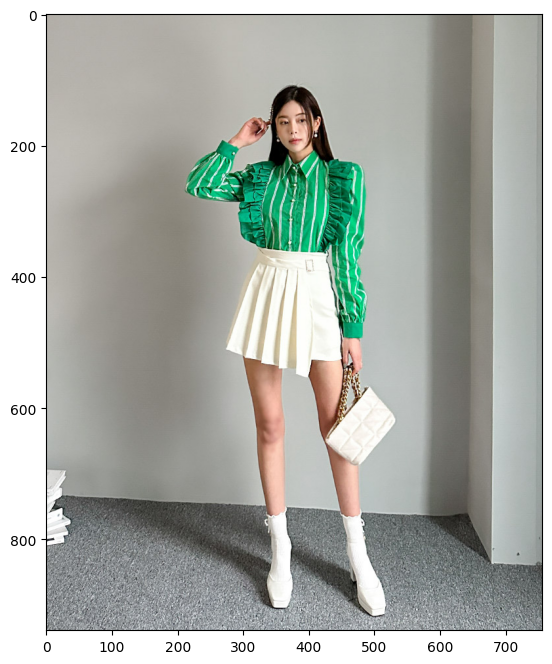

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(images)
plt.show()

In [ ]:
import torch
from torchvision import transforms

transform = transforms.Compose(
        [
            transforms.PILToTensor(),
            transforms.ConvertImageDtype(dtype = torch.float),
            transforms.Resize(256)
            ,transforms.Normalize(
                mean = [0.48235,0.45882,0.40784],
                std = [1.0/255.0,1.0/255.0,1.0/255.0]
            )
        ]
    )

images = transform(images)
images

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor([[[ 54.0192,  55.9494,  55.9840,  ...,  39.8122,  25.3009,  29.9823],
         [ 55.9453,  55.1119,  55.0575,  ...,  38.8893,  27.2252,  29.9440],
         [ 55.0220,  56.7085,  56.9061,  ...,  39.4614,  26.9981,  29.7381],
         ...,
         [ 48.4695, -33.7117,  -0.8060,  ..., -10.5305,  -0.6965,   6.1548],
         [  4.7096,  13.0986,  10.9147,  ...,  -2.6823, -27.6153,  26.0845],
         [ 33.4805,  75.5594,  17.3291,  ...,  19.0116,  22.8256,   4.3883]],

        [[ 57.0194,  57.1253,  57.0220,  ...,  48.8123,  34.3011,  38.9824],
         [ 58.9455,  56.2527,  56.0577,  ...,  47.8894,  36.2254,  38.9441],
         [ 58.0221,  57.8493,  57.9063,  ...,  48.4616,  35.9982,  38.7382],
         ...,
         [ 58.4696, -23.7115,   9.1941,  ...,   0.4696,  10.3037,  17.1549],
         [ 14.7098,  23.0987,  20.9148,  ...,   8.3179, -16.6152,  37.0847],
         [ 43.4807,  82.7705,  24.3292,  ...,  33.0117,  36.8258,  18.3884]],

        [[ 63.0193,  64.0373,  64.0030,  ...

In [ ]:
with torch.no_grad():
  model.eval()
  images = images.to(device).unsqueeze(0)
  output = model(images)
  outputs = torch.sigmoid(output).cpu().detach().numpy().tolist()

In [ ]:
out = [1 if x > 0.7 else 0 for x in outputs[0]]

In [ ]:
df3['idx'] = range(len(df3))
df3['idx'] = df3['idx'].astype(str)

tex_id = df3[df3['attribute_name'].str.contains('neck')]['attribute_name'].tolist()

In [ ]:
df = pd.DataFrame( {
    'name': tex_id,
    'idx': outputs[0]
    })

df[df['idx'] >= 0.5]

In [ ]:

targets=[]
outputs=[]

with torch.no_grad():
  model.eval()

  # accuracy = 0.0
  for images, classes in test_dataloader:
    images = images.to(device)
    classes = classes.to(device)
    outputs = model(images)
    targets.extend(targets.cpu().detach().numpy().tolist())
    outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
outputs = [[round(outputs[x][i]) for i in range(0,14)] for x in range(0,len(outputs))]
len(outputs), len(targets)

In [ ]:
import pprint
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import classification_report

pp = pprint.PrettyPrinter(indent=4)

pprint.pprint(classification_report(targets,np.array(outputs,dtype=np.int)))